In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import pathlib
import os
import numpy as np
from PIL import Image

In [3]:
import tensorflow as tf
import numpy as np
from pathlib import Path
from tensorflow import keras
from importlib import import_module
from fast_deep_sort.preprocess import load_frames
from fast_deep_sort.detection import load_detector
from fast_deep_sort.track import TrackManager
from main import generate_tracks

In [4]:
tracks = generate_tracks()
tracks

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [33]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import display, Image, HTML
import seaborn as sns

In [46]:
max_frames = 0
color_pallete = sns.color_palette("hls", len(tracks))
track_colors = {}
for track_idx, track in enumerate(tracks):
    if track.get_last_detection().frame_idx > max_frames:
        max_frames = track.get_last_detection().frame_idx
    track_colors[track] = color_pallete[track_idx]
max_frames

55

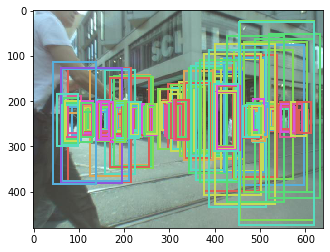

In [50]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
from matplotlib.artist import Artist
import matplotlib.image as mpimg

fig = plt.figure()
ax = plt.gca()
class Visual:
    def __init__(self, frame_idx, image_file, tracks):
        self.frame_idx = frame_idx
        self.image_file = image_file
        self.active_detections = []
        self.active_tracks = []
        self.fading_detections = []
        self.faded_detections = []
        self.faded_tracks = []
        for track in tracks:
            if frame_idx in track.detections.keys():
                self.active_detections.append(track.detections[frame_idx])
                self.active_tracks.append(track)
            else:
                self.faded_tracks.append(track)
                '''
                for backtrack in range(frame_idx, 0, -1):
                    if backtrack in track.detections.keys():
                        self.faded_detections.append(track.detections[backtrack])
                        self.faded_tracks.append(track)
                        break
                '''
        
        # generate artists
        self.artists = []
        
        #image artist
        pil_im = mpimg.imread(image_file, 'r');
        im_arr = np.asarray(pil_im);
        im = plt.imshow(im_arr, animated=True);
        self.artists.append(im)
        
        image_width = im_arr.shape[1]
        image_height = im_arr.shape[0]

  

        # active detection rect artists
        for track in self.active_tracks:
            detection = track.detections[frame_idx]
            x = detection.left(image_width)
            y = detection.top(image_height)
            width = detection.width(image_width)
            height = detection.height(image_height)
            rect = Rectangle((x, y),width, height,linewidth=2,edgecolor=track_colors[track],facecolor='none', animated=True)
            rect_art = ax.add_patch(rect)
            self.artists.append(rect_art)
            
        
    
visuals = []

image_dir = Path('./input_frames')
image_files = os.listdir(image_dir)
for frame_idx in range(max_frames):
    vis = Visual(frame_idx, image_dir/image_files[frame_idx], tracks)
    visuals.append(vis)

In [49]:
ims = [vis.artists for vis in visuals] 
ani = animation.ArtistAnimation(fig, ims, interval=60, blit=False,
                                repeat_delay=1000)

HTML(ani.to_html5_video())